In [58]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pylab import rcParams

# set up display area to show dataframe in jupyter qtconsole
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# load data - change date when new data available
url="https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-16.xls"
df=pd.read_excel(url)

# set index to df
df['DateRep'] = pd.to_datetime(df['DateRep'])
#df.set_index(['CountryExp','DateRep'], inplace=True)

#df.loc['Italy'].loc['2020-03-15'].NewConfCases = 3590
#df.loc['Italy'].loc['2020-03-15']
#df.at['Italy', '2020-03-15']


,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
0,2020-03-16,Afghanistan,6,0.0,AF,NaN,Non-EU/EEA
1,2020-03-15,Afghanistan,3,0.0,AF,NaN,Non-EU/EEA
2,2020-03-11,Afghanistan,3,0.0,AF,NaN,Non-EU/EEA
3,2020-03-08,Afghanistan,3,0.0,AF,NaN,Non-EU/EEA
4,2020-03-02,Afghanistan,0,0.0,AF,NaN,Non-EU/EEA
...,...,...,...,...,...,...,...
5245,2020-01-04,Vietnam,0,0.0,VN,NaN,Non-EU/EEA
5246,2020-01-03,Vietnam,0,0.0,VN,NaN,Non-EU/EEA
5247,2020-01-02,Vietnam,0,0.0,VN,NaN,Non-EU/EEA
5248,2020-01-01,Vietnam,0,0.0,VN,NaN,Non-EU/EEA


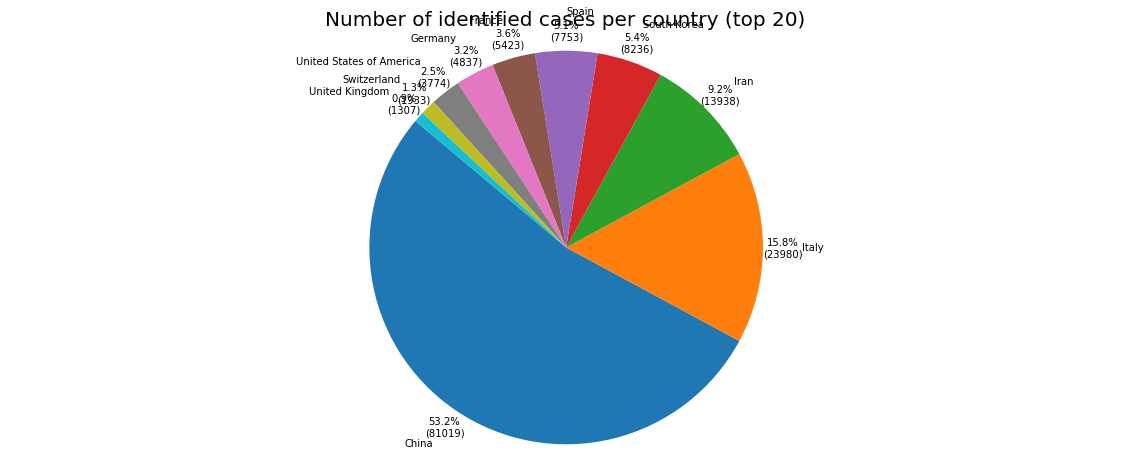

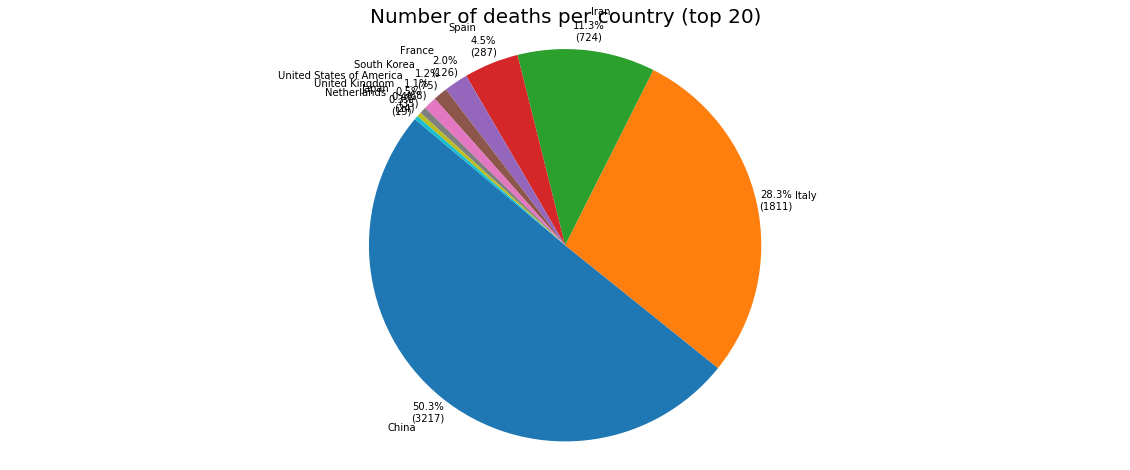

In [45]:
df_grouped_by_country = df.groupby(['CountryExp']).sum()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

def plot_pie_charts(chart_name, df, col_name):  
    # get total per country
    df = df.sort_values(by=col_name, ascending=False).nlargest(10, [col_name])
    
    # Data to plot
    labels = list(df.index.values)
    sizes = df[col_name]

    # Plot
    rcParams['figure.figsize'] = 20, 8
    plt.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes), startangle=140, pctdistance=1.1, labeldistance=1.2)
    plt.axis('equal')
    plt.title(chart_name, fontsize=20)
    plt.show()


# Plot
plot_pie_charts('Number of identified cases per country (top 20)', df_grouped_by_country, 'NewConfCases')
plot_pie_charts('Number of deaths per country (top 20)', df_grouped_by_country, 'NewDeaths')

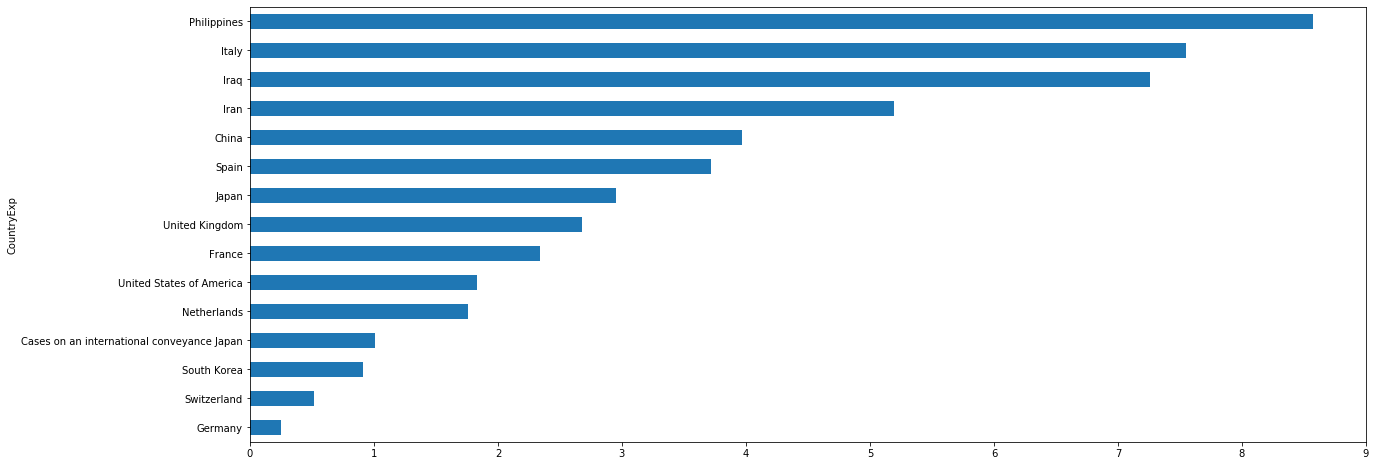

In [5]:
# mortality rate (bias because not all cases are identified)
df_new = df_grouped_by_country.nlargest(15, ['NewDeaths'])
df_new['Mortality_rate'] = df_new['NewDeaths'] / df_new['NewConfCases'] * 100
df_new = df_new.sort_values(by='Mortality_rate', ascending=True)

# plot
df_new['Mortality_rate'].plot(kind='barh')

In [43]:
# top 15
top_15_affected_countries = df_grouped_by_country.nlargest(15, ['NewConfCases']).index.values
list_top_15 = list(top_15_affected_countries)
#df_new = df.loc[list_top_15, :]

df_new = df.drop(['GeoId','Gaul1Nuts1', 'EU'], 1)
for s_country in list_top_15:
    df_tmp = df_new.loc[s_country, :]
    df_tmp = df_tmp.sort_index(axis = 0)
    df_tmp['cum_conf_cases'] = df_tmp.NewConfCases.cumsum(skipna = False)
    df_tmp['pct_chg_1d'] = df_tmp.cum_conf_cases.pct_change(1) * 100
    df_tmp['pct_chg_3d'] = df_tmp.cum_conf_cases.pct_change(3) * 100
    
    print(s_country)
    print(df_tmp.tail(10))
#df_new.NewConfCases
#pct_change(1)

# DATA ITALY KO


#top_15_affected_countries
#df


China
            NewConfCases  NewDeaths  cum_conf_cases  pct_chg_1d  pct_chg_3d
DateRep                                                                    
2020-03-07           101       28.0           80768    0.125206    0.482707
2020-03-08            46       27.0           80814    0.056953    0.393803
2020-03-09            45       23.0           80859    0.055683    0.238016
2020-03-10            20       17.0           80879    0.024734    0.137431
2020-03-11            29       22.0           80908    0.035856    0.116316
2020-03-12            24       11.0           80932    0.029663    0.090281
2020-03-13            22        7.0           80954    0.027183    0.092731
2020-03-14            19       15.0           80973    0.023470    0.080338
2020-03-15            22        9.0           80995    0.027170    0.077843
2020-03-16            25       14.0           81020    0.030866    0.081528
Italy
            NewConfCases  NewDeaths  cum_conf_cases  pct_chg_1d  pct_chg_3d


Belgium
            NewConfCases  NewDeaths  cum_conf_cases  pct_chg_1d  pct_chg_3d
DateRep                                                                    
2020-03-07            59        0.0             109  118.000000  738.461538
2020-03-08            60        0.0             169   55.045872  634.782609
2020-03-09            31        0.0             200   18.343195  300.000000
2020-03-10            39        0.0             239   19.500000  119.266055
2020-03-11            28        0.0             267   11.715481   57.988166
2020-03-12            47        3.0             314   17.602996   57.000000
2020-03-13            85        0.0             399   27.070064   66.945607
2020-03-14           160        0.0             559   40.100251  109.363296
2020-03-15           130        1.0             689   23.255814  119.426752
2020-03-16           197        0.0             886   28.592163  122.055138
Denmark
            NewConfCases  NewDeaths  cum_conf_cases  pct_chg_1d   pct_ch